# Exercise 1 - describe function

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
data = np.random.randint(1, 100, 1000)

In [16]:
data[10] = 200
data[11] = 202

In [53]:
def describe(data):
    d = {}
    d['n'] = len(data)
    d['min'] = np.min(data)
    d['max'] = np.max(data)
    d['mean'] = np.mean(data)
    d['std'] = np.std(data)
    d['lower_z3'] = d['mean'] - 3 * d['std']
    d['upper_z3'] = d['mean'] + 3 * d['std']
    # d['outliers_z'] = list(data[(data < d['lower_z3']) | (data > d['upper_z3'])])[:8]
    d['q1'] = np.quantile(data, q=0.25)
    d['median'] = np.median(data)
    d['q3'] = np.quantile(data, q=0.75)
    d['iqr'] = d['q3'] - d['q1']
    d['lower_tukey'] = d['q1'] - 1.5 * d['iqr']
    d['upper_tukey'] = d['q3'] + 1.5 * d['iqr']    
    # d['outliers_tukey'] = list(data[(data < d['lower_tukey']) | (data > d['upper_tukey'])])[:8]
    d['skew'] = stats.skew(data)
    d['kurtosis'] = stats.kurtosis(data)
    return d

In [54]:
d = describe(data)
d

{'n': 20,
 'min': np.int64(1),
 'max': np.int64(99),
 'mean': np.float64(53.1),
 'std': np.float64(31.472051092993606),
 'lower_z3': np.float64(-41.31615327898081),
 'upper_z3': np.float64(147.51615327898082),
 'q1': np.float64(22.5),
 'median': np.float64(56.0),
 'q3': np.float64(83.0),
 'iqr': np.float64(60.5),
 'lower_tukey': np.float64(-68.25),
 'upper_tukey': np.float64(173.75),
 'skew': np.float64(-0.21151318381771375),
 'kurtosis': np.float64(-1.3825446320263666)}

In [55]:
for k, v in d.items():
    try:
        print(f'{k:20} : {v:8.2f}')
    except TypeError:
        print(f'{k:20} : {v}')

n                    :    20.00
min                  :     1.00
max                  :    99.00
mean                 :    53.10
std                  :    31.47
lower_z3             :   -41.32
upper_z3             :   147.52
q1                   :    22.50
median               :    56.00
q3                   :    83.00
iqr                  :    60.50
lower_tukey          :   -68.25
upper_tukey          :   173.75
skew                 :    -0.21
kurtosis             :    -1.38


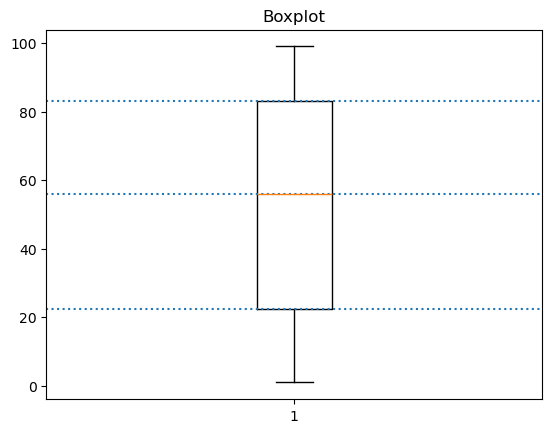

In [56]:
plt.boxplot(data)
plt.axhline(d['q1'], linestyle='dotted')
plt.axhline(d['median'], linestyle='dotted')
plt.axhline(d['q3'], linestyle='dotted')
plt.title('Boxplot')
plt.show()

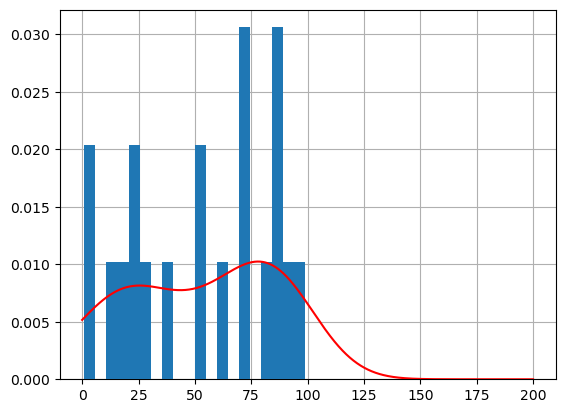

In [57]:
kde = stats.gaussian_kde(data)
xx = np.linspace(0, 200, 1000)

plt.hist(data, bins = 20, density=True, zorder = 3)
plt.plot(xx, kde(xx), zorder=4, color='red')
plt.grid()
plt.show()

### Diamonds dataset

In [58]:
import seaborn as sns

In [59]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [60]:
dataset = sns.load_dataset('diamonds')

In [61]:
dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [63]:
d = describe(dataset['price'])
d

{'n': 53940,
 'min': np.int64(326),
 'max': np.int64(18823),
 'mean': np.float64(3932.799721913237),
 'std': np.float64(3989.4027576288736),
 'lower_z3': np.float64(-8035.408550973383),
 'upper_z3': np.float64(15901.007994799858),
 'q1': np.float64(950.0),
 'median': np.float64(2401.0),
 'q3': np.float64(5324.25),
 'iqr': np.float64(4374.25),
 'lower_tukey': np.float64(-5611.375),
 'upper_tukey': np.float64(11885.625),
 'skew': np.float64(1.6183502776053016),
 'kurtosis': np.float64(2.177382669056634)}

In [64]:
for k, v in d.items():
    try:
        print(f'{k:20} : {v:8.2f}')
    except TypeError:
        print(f'{k:20} : {v}')

n                    : 53940.00
min                  :   326.00
max                  : 18823.00
mean                 :  3932.80
std                  :  3989.40
lower_z3             : -8035.41
upper_z3             : 15901.01
q1                   :   950.00
median               :  2401.00
q3                   :  5324.25
iqr                  :  4374.25
lower_tukey          : -5611.38
upper_tukey          : 11885.62
skew                 :     1.62
kurtosis             :     2.18


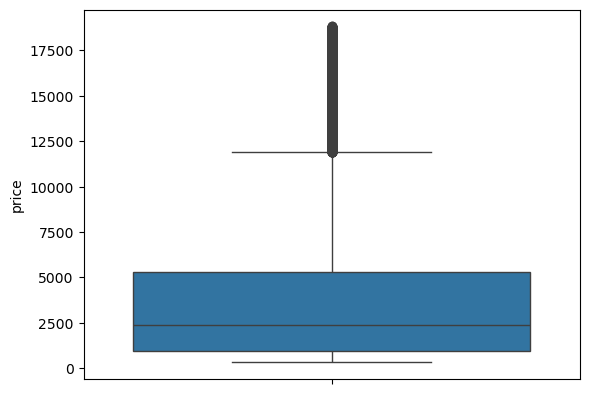

In [65]:
sns.boxplot(dataset['price']);

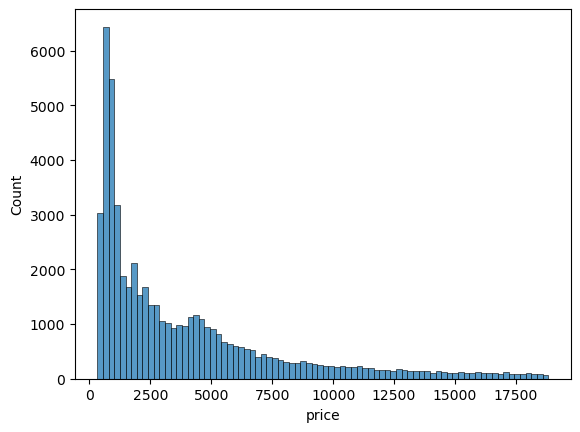

In [66]:
sns.histplot(dataset['price']);

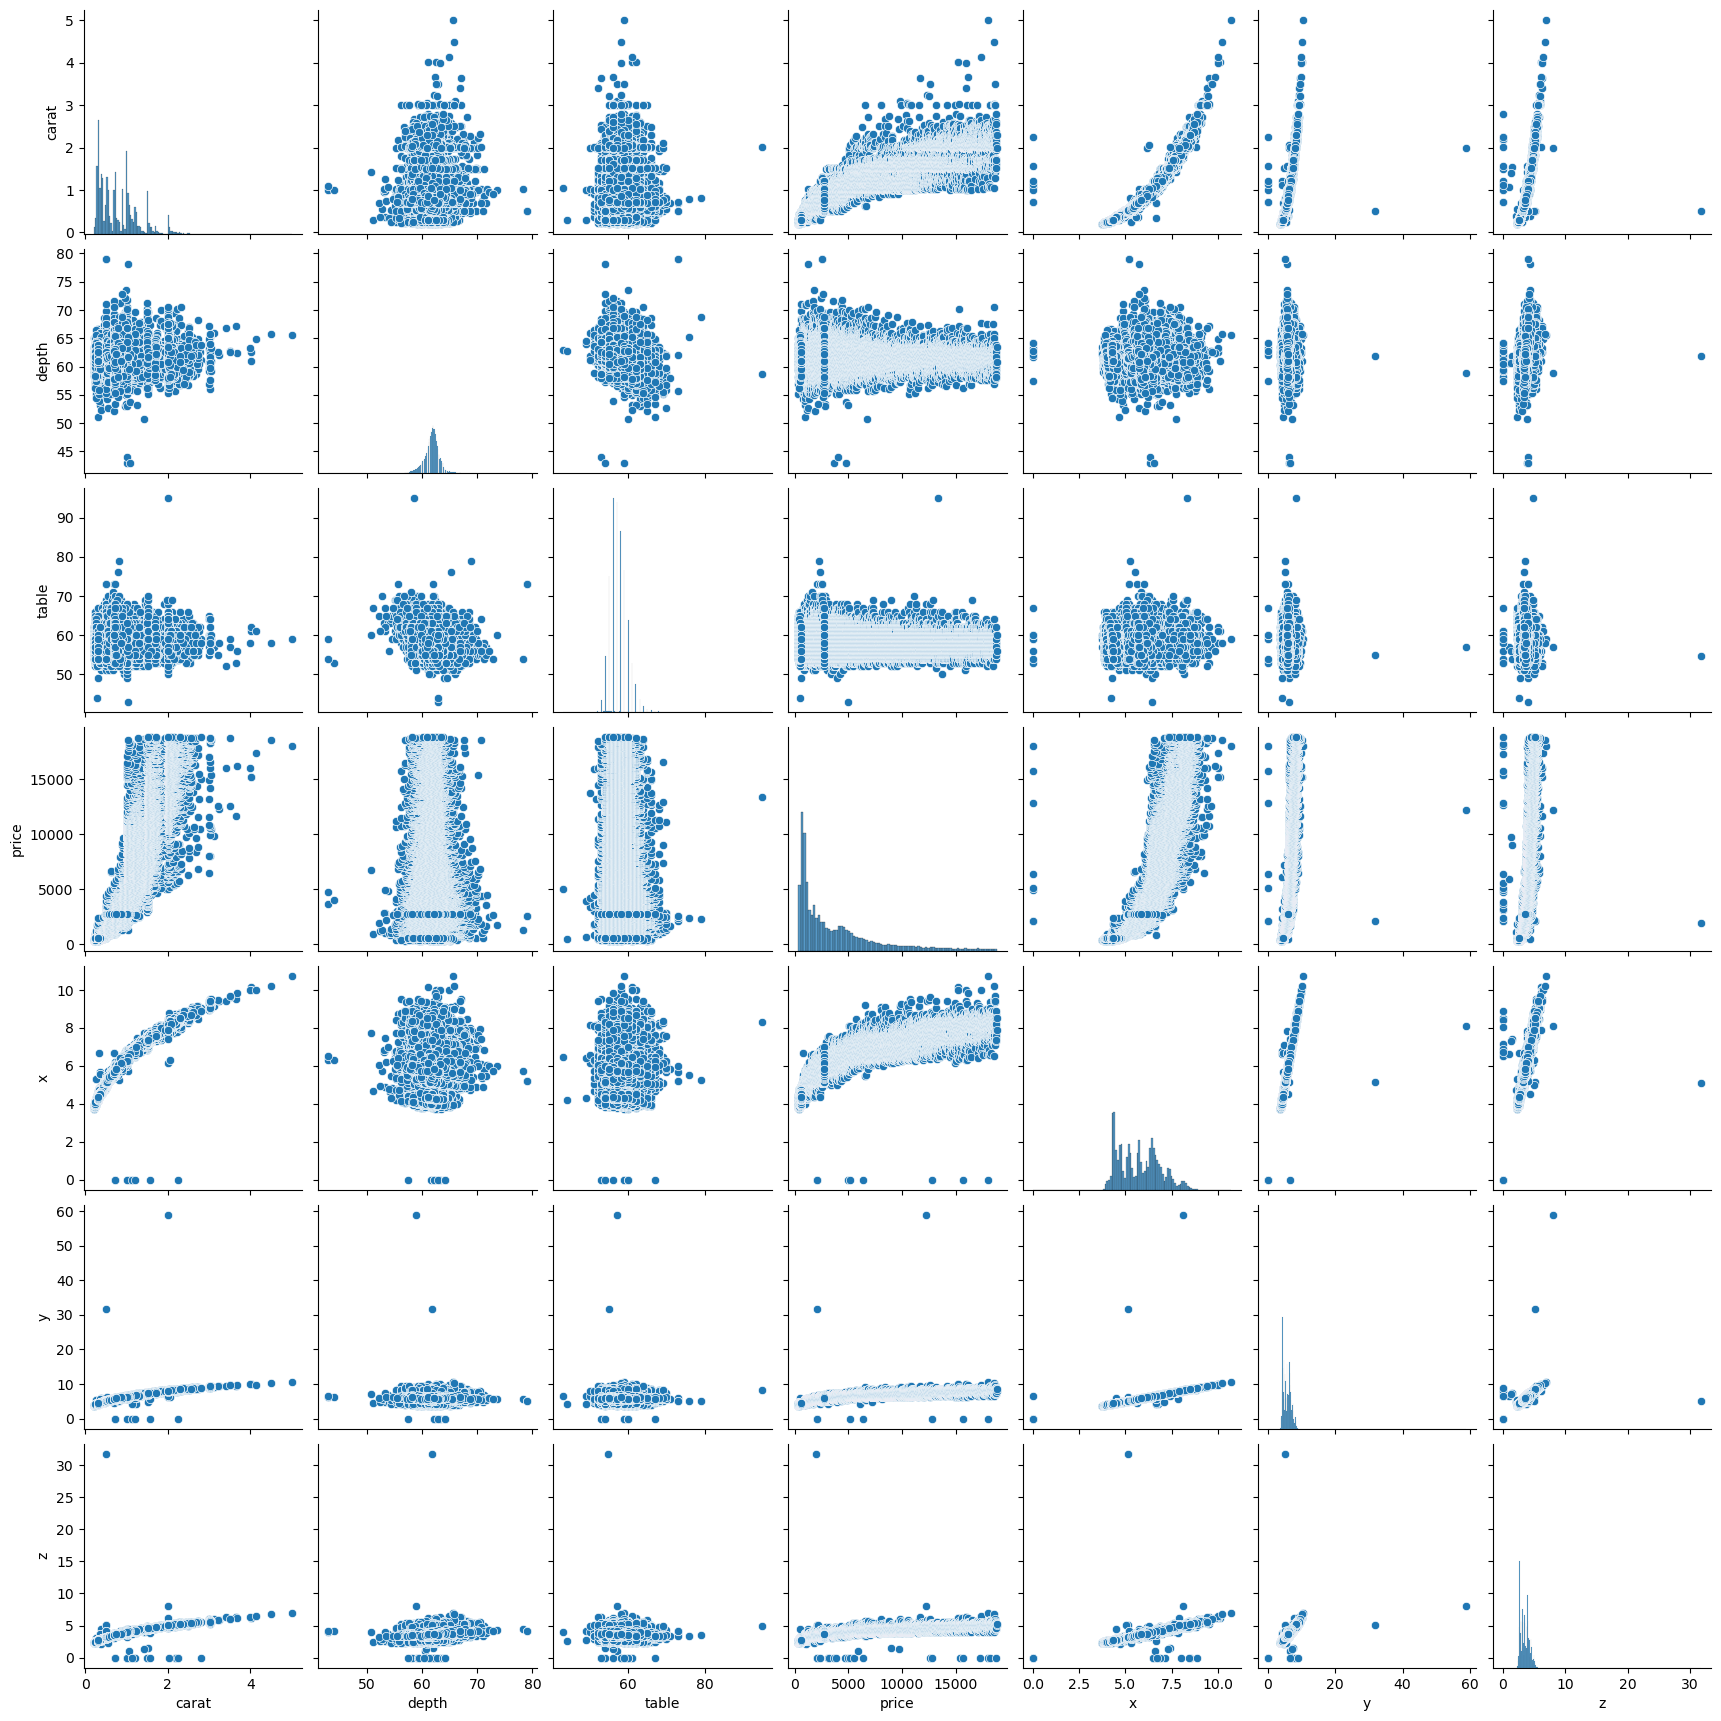

In [68]:
sns.pairplot(dataset);

### Uit ChatGPT

In [52]:
import numpy as np
from scipy import stats

def describe(arr):
    arr = np.array(arr)

    # Stap 3: lege dictionary
    d = {}

    # Stap 4: statistieken toevoegen
    d["aantal"] = len(arr)
    d["minimum"] = np.min(arr)
    d["maximum"] = np.max(arr)
    d["som"] = np.sum(arr)
    d["gemiddelde"] = np.mean(arr)
    d["mediaan"] = np.median(arr)

    # mode() geeft een object terug; we nemen de eerste waarde
    mode_res = stats.mode(arr, keepdims=True)
    d["mode"] = int(mode_res.mode[0])

    d["standaard_deviatie"] = np.std(arr, ddof=1)

    # kwartielen
    d["Q1"] = np.percentile(arr, 25)
    d["Q3"] = np.percentile(arr, 75)
    d["IQR"] = d["Q3"] - d["Q1"]

    # skewness & kurtosis
    d["skewness"] = stats.skew(arr, bias=False)
    d["kurtosis"] = stats.kurtosis(arr, bias=False)

    # Stap 7: Tukey outlier grenzen
    lower_bound = d["Q1"] - 1.5 * d["IQR"]
    upper_bound = d["Q3"] + 1.5 * d["IQR"]

    d["outlier_grens_onder"] = lower_bound
    d["outlier_grens_boven"] = upper_bound

    outliers = arr[(arr < lower_bound) | (arr > upper_bound)]
    d["outliers"] = list(outliers)

    return d


# Stap 1 en 6: lijst met willekeurige gehele getallen
np.random.seed(42)  # zodat de test reproduceerbaar is
data = np.random.randint(0, 100, size=20)

# Test de functie
result = describe(data)
print("Data:", data)
print("\nResultaat:")
for k, v in result.items():
    print(f"{k}: {v}")

Data: [51 92 14 71 60 20 82 86 74 74 87 99 23  2 21 52  1 87 29 37]

Resultaat:
aantal: 20
minimum: 1
maximum: 99
som: 1062
gemiddelde: 53.1
mediaan: 56.0
mode: 74
standaard_deviatie: 32.28964311712935
Q1: 22.5
Q3: 83.0
IQR: 60.5
skewness: -0.2290639448763368
kurtosis: -1.4301807456814386
outlier_grens_onder: -68.25
outlier_grens_boven: 173.75
outliers: []
